In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nbodykit.lab import *
import mpl_toolkits.axes_grid1 as axgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable

from subprocess import call

import astropy.io.fits as pyf

# Matplotlib darkmode + color picker 
%matplotlib inline
plt.style.use('dark_background')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 22

from cycler import cycler

neon_colors = ['#FFFF00', '#FF0000', '#00FF00', '#00FFFF', '#FF00FF', '#9D00FF',
'#FFFF33', '#FD1C03', '#00FF33', '#099FFF', '#FF00CC', '#CC00FF', 
'#F2EA02', '#FF3300', '#00FF66', '#0062FF', '#FF0099', '#6E0DD0', 
'#E6FB04', '#FF6600', '#33FF00', '#0033FF', '#CC00FF', '#9900FF']
custom_cycler = (cycler(color=neon_colors))
plt.rc('axes', prop_cycle=custom_cycler)


# James' Code +
# plotting utilities
from plot_utils import plot_util_4pcf

import _4PCF_Algorithm as fourpcf

from tqdm.notebook import tqdm_notebook
print("Import necessary libraries and packages")

Import necessary libraries and packages


# Pull Data from CATS

In [3]:
!wget https://users.flatironinstitute.org/~bburkhart/data/CATS/MHD/256/b.1p.32/t_800/dens_t800.fits.gz
!ls

--2021-08-04 00:44:49--  https://users.flatironinstitute.org/~bburkhart/data/CATS/MHD/256/b.1p.32/t_800/dens_t800.fits.gz
Resolving users.flatironinstitute.org (users.flatironinstitute.org)... 2606:4700:20::ac43:4b39, 2606:4700:20::ac43:4b50, 2606:4700:20::ac43:4b3c, ...
Connecting to users.flatironinstitute.org (users.flatironinstitute.org)|2606:4700:20::ac43:4b39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58559678 (56M) [application/octet-stream]
Saving to: ‘dens_t800.fits.gz.1’

dens_t800.fits.gz.1 100%[===================>]  55.85M  22.9MB/s    in 2.4s    

2021-08-04 00:44:52 (22.9 MB/s) - ‘dens_t800.fits.gz.1’ saved [58559678/58559678]

CG_Coeffs_2.npy     Untitled.ipynb      dens_t800.fits.gz   testing
FFT_Files           _4PCF_Algorithm.py  dens_t800.fits.gz.1
Plots               __pycache__         plot_utils.py


In [4]:
run_name = 'dens_t800'
file_name = run_name +'.fits.gz'

hdulist = pyf.open(file_name)
data = hdulist[0].data.astype(np.float64) # hopefully 64 is enough?

#FT OF SHIFTED DATA
normalized = False # do log normalization
if normalized:
    data = (np.log(data) - np.mean(np.log(data)))/np.std(np.log(data))
ft_data = np.fft.fftn(data)

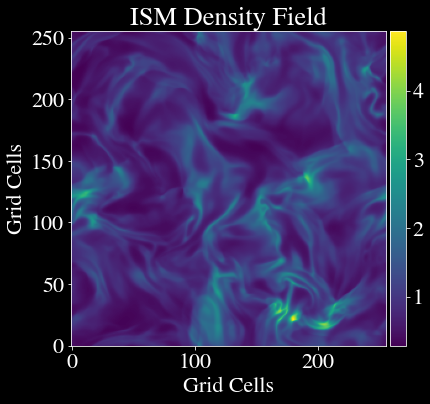

In [6]:
f, (ax1) = plt.subplots(1,1, figsize=(6,6))

im1 = ax1.imshow(data[:,128,:], origin='lower')
ax1.set_title("ISM Density Field")
ax1.set_xlabel("Grid Cells")
ax1.set_ylabel("Grid Cells")
divider1 = axgrid.make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im1, cax=cax1)
plt.show()

In [5]:
save_dir = '/Users/jamessunseri/Desktop/uf_reu/4pcf_ISM/Workspace/MHD_4pcf_runs/FFT_Files/10_bins/'

save_name = 'FFT_compare_10_bins_' 

_4pcf_object = fourpcf.measure_4pcf(density_field_data=data,
                                save_dir=save_dir, save_name = save_name, 
                                nbins=5, ld_one_d=256, ell_max=0)



In [6]:
_4pcf_object.run_all(verbose_flag=True)

Creating XYZ Grids for radial bin and ylm creation ... 

Creating radial bins ... 

taking the fourier transform of data ... 

Binning Spherical Harmonics...
ell, m =  0 0
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4

Calculating almb coefficients...

l, m, bin = 0 0 0
l, m, bin = 0 0 1
l, m, bin = 0 0 2
l, m, bin = 0 0 3
l, m, bin = 0 0 4
Executing 4PCF Calculation ...


ell_1's:   0%|          | 0/1 [00:00<?, ?it/s]

ell_2's:   0%|          | 0/1 [00:00<?, ?it/s]

ell_3's:   0%|          | 0/1 [00:00<?, ?it/s]

b_1:   0%|          | 0/5 [00:00<?, ?it/s]

b_2:   0%|          | 0/4 [00:00<?, ?it/s]

b_3:   0%|          | 0/3 [00:00<?, ?it/s]

b_3:   0%|          | 0/2 [00:00<?, ?it/s]

b_3:   0%|          | 0/1 [00:00<?, ?it/s]

b_3: 0it [00:00, ?it/s]

b_2:   0%|          | 0/3 [00:00<?, ?it/s]

b_3:   0%|          | 0/2 [00:00<?, ?it/s]

b_3:   0%|          | 0/1 [00:00<?, ?it/s]

b_3: 0it [00:00, ?it/s]

b_2:   0%|          | 0/2 [00:00<?, ?it/s]

b_3:   0%|          | 0/1 [00:00<?, ?it/s]

b_3: 0it [00:00, ?it/s]

b_2:   0%|          | 0/1 [00:00<?, ?it/s]

b_3: 0it [00:00, ?it/s]

b_2: 0it [00:00, ?it/s]

Finished Calculating 4PCF in 18.6034 seconds


In [14]:
#we run this to delete all the files that were created in the process
call('rm ' + save_dir + 'bin_bounds*', shell=True)
call('rm ' + save_dir + 'ylm_*', shell=True)
call('rm ' + save_dir + 'YLMtilde' + '*', shell=True)
call('rm ' + save_dir + save_name + 'conv_data_kernel_*', shell=True)

1

In [15]:
_4pcf_object.save_zeta()

Saving normalized zetas


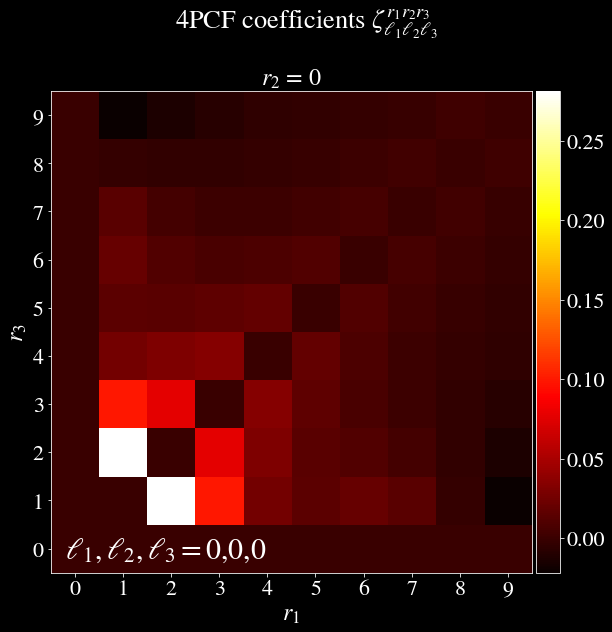

In [167]:
zeta_full = np.load('FFT_Files/FFT_compare_10_bins__zeta_normed.npy')

ells='000'
b_2 = 0
text_fontsize = 30
sub_title_fontsize = 24
nbins = 10
xylabel_fontsize = 24

zeta= zeta_full[int(ells[0]), int(ells[1]),int(ells[2]), :,:,:]

f, (ax1) = plt.subplots(1,1, figsize=(9,9))

ells_string = '$\\ell_1, \ell_2, \ell_3 = $' + ells[0] + ',' + ells[1] + ',' + ells[2]
f.suptitle('4PCF coefficients $\\zeta^{r_1 r_2 r_3}_{\ell_1 \ell_2 \ell_3}$')

im1 = ax1.imshow(zeta[:,b_2,:].real, origin='lower', cmap='hot')
ax1.text(-0.2,-0.2, ells_string, c='white', fontsize=text_fontsize)
ax1.set_title('$r_2$ = ' + str(b_2), fontsize=sub_title_fontsize)
ax1.set_xticks(range(nbins))
ax1.set_yticks(range(nbins))
ax1.set_xlabel("$r_1$",fontsize=xylabel_fontsize)
ax1.set_ylabel("$r_3$", fontsize=xylabel_fontsize)
divider1 = axgrid.make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im1, cax=cax1)
# im1.set_clim(-0.25, 0.25)
plt.tight_layout()
# plt.savefig('Plots/Nbins_10_Λ_000_0d_'+ str(b_2) + '.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
np.shape(zeta)

(2, 2, 2, 5, 5, 5)